# 60 minutes Pytorch入门

## 一、get started

### 1.Tensors 张量
tensor可以做为numpy的替代品，同时更加可以发挥GPU的效果

In [1]:
from __future__ import print_function
import torch

In [2]:
# 新建一个矩阵
x = torch.Tensor(5, 3)
x


1.00000e-37 *
  0.0000  0.0000  0.0000
  0.0000  5.5015  0.0000
  5.6039  0.0000  3.9907
  0.0000  1.3325  0.0000
  0.0000  0.0000  0.0000
[torch.FloatTensor of size 5x3]

In [3]:
# 随机阵
x = torch.rand(5, 3)
x


 0.6491  0.3308  0.3534
 0.1966  0.3458  0.1936
 0.4582  0.1313  0.8067
 0.5349  0.6012  0.8129
 0.8860  0.6196  0.1326
[torch.FloatTensor of size 5x3]

In [4]:
# 返回矩阵的维度, 很明显是一个tuple
x.size()

torch.Size([5, 3])

### 2. Operations
有许多中可以使用的语法

In [5]:
# 加法 1
y = torch.rand(5, 3)
x+y


 1.0658  0.8540  0.8385
 0.5207  0.4069  0.7637
 0.5727  1.0757  1.6917
 1.4637  0.9160  1.5891
 1.0428  0.6364  0.4621
[torch.FloatTensor of size 5x3]

In [6]:
# 加法 2
torch.add(x,y)


 1.0658  0.8540  0.8385
 0.5207  0.4069  0.7637
 0.5727  1.0757  1.6917
 1.4637  0.9160  1.5891
 1.0428  0.6364  0.4621
[torch.FloatTensor of size 5x3]

In [7]:
#  加法3：事先声明一个存储结果的tensor
result = torch.Tensor(5, 3)
torch.add(x, y, out = result)



 1.0658  0.8540  0.8385
 0.5207  0.4069  0.7637
 0.5727  1.0757  1.6917
 1.4637  0.9160  1.5891
 1.0428  0.6364  0.4621
[torch.FloatTensor of size 5x3]

In [8]:
result


 1.0658  0.8540  0.8385
 0.5207  0.4069  0.7637
 0.5727  1.0757  1.6917
 1.4637  0.9160  1.5891
 1.0428  0.6364  0.4621
[torch.FloatTensor of size 5x3]

In [9]:
# 加法4 直接在自身做替代
# 即将x加到y上面，y = y + x
y.add_(x)
y


 1.0658  0.8540  0.8385
 0.5207  0.4069  0.7637
 0.5727  1.0757  1.6917
 1.4637  0.9160  1.5891
 1.0428  0.6364  0.4621
[torch.FloatTensor of size 5x3]

**注** ：每一个operation以_结尾的时候，都是在自身上做操作的

In [10]:
x


 0.6491  0.3308  0.3534
 0.1966  0.3458  0.1936
 0.4582  0.1313  0.8067
 0.5349  0.6012  0.8129
 0.8860  0.6196  0.1326
[torch.FloatTensor of size 5x3]

In [11]:
x.t_() #转置，x自身


 0.6491  0.1966  0.4582  0.5349  0.8860
 0.3308  0.3458  0.1313  0.6012  0.6196
 0.3534  0.1936  0.8067  0.8129  0.1326
[torch.FloatTensor of size 3x5]

In [12]:
x[:, 1]


 0.1966
 0.3458
 0.1936
[torch.FloatTensor of size 3]

In [13]:
x[1,]


 0.3308
 0.3458
 0.1313
 0.6012
 0.6196
[torch.FloatTensor of size 5]

In [14]:
x[1:2,] #和numpy类似


 0.3308  0.3458  0.1313  0.6012  0.6196
[torch.FloatTensor of size 1x5]

In [15]:
x[1,0:2]


 0.3308
 0.3458
[torch.FloatTensor of size 2]

### 3. Numpy Bridge
Numpy对象和torch中的Tensor会共享同样的内存地址，因此任何一个发生改变，另一个都会改变

+ 将torch Tensor转换为numpy Array

In [16]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [17]:
b = a.numpy() #numpy对象
print(b)

[ 1.  1.  1.  1.  1.]


In [18]:
a.add_(1)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

In [19]:
# 可以看到b也发生了对应的变化
b

array([ 2.,  2.,  2.,  2.,  2.], dtype=float32)

+ 将numpy Array转换为torch Tensor

In [20]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
a

array([ 1.,  1.,  1.,  1.,  1.])

In [21]:
b


 1
 1
 1
 1
 1
[torch.DoubleTensor of size 5]

In [22]:
np.add(a, 1, out=a)
a

array([ 2.,  2.,  2.,  2.,  2.])

In [23]:
b


 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]

### 4. cuda Tensors
tensors可以使用函数 `.cuda()`来将其移动到CPU中

In [24]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

## 二、Autograd:automatic differentiation
torch中的神经网络模型都是使用 `autograd` 包来进行微分计算

### Variables
`autograd.Variable` 包含了Tensor和其operation，当调用 `.backward()`时所有的梯度就会自动计算

可以通过 .data  属性来获取raw tensor ， grad累计进入 .grad

## function

function和variables是内在连接的，构成无环图 。 

In [25]:
import torch
from torch.autograd import Variable

In [26]:
# create a variable
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [27]:
x.type

<bound method Variable.type of Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]
>

In [28]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [29]:
y.creator

In [30]:
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [31]:
z = y * y * 3
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



### Gradients
out.backward()就相当于out.backward(torch.Tensor([1.0]))

In [32]:
out.backward()

In [33]:
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [34]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



这上面的式子是Variable O可以表示为$ O = \frac{1}{4} \sum_i{z_i}, 其中z_i = 3(x_i^2 + 2)^2$， 有$z_i|_{x_i=1}=27$,倒数为$\frac{\partial o}{\partial x_i}=\frac{3}{2}(x_i+2)$, 在$x_i=1$处的导数就是4.5。

In [35]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x*2

In [36]:
x

Variable containing:
-0.3458
 2.3862
 0.7833
[torch.FloatTensor of size 3]

In [37]:
while y.data.norm( ) < 1000:
    y = y *2
    z = y ** 2
    
print(y)

Variable containing:
 -177.0719
 1221.7506
  401.0299
[torch.FloatTensor of size 3]



In [38]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
z.backward(gradients) #在这个向量处求梯度

print(x.grad)

Variable containing:
-1.8132e+04
 1.2511e+06
 4.1065e+01
[torch.FloatTensor of size 3]



## 三、神经网络


In [39]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [40]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


只需要自定义forward函数，而不需要定义backward函数。
可学习的参数可以 通过 net.parameters()返回

In [41]:
params = list(net.parameters())
print(len(params),'\n', params[0].size())   

10 
 torch.Size([6, 1, 5, 5])


forward函数的输入就是一个 autograd.Variable ，输出也是这个对象

In [42]:
input = Variable(torch.randn(1, 1, 32, 32))
input

Variable containing:
(0 ,0 ,.,.) = 
  1.0052  0.4649  1.2281  ...  -0.1640  0.7024  0.6511
 -1.1092 -0.5801  0.2267  ...   1.6684 -1.4471  0.6620
 -1.8891 -3.0296  0.0358  ...   0.4829 -0.7369 -0.4732
           ...             ⋱             ...          
 -0.2282 -1.3552  1.4080  ...  -0.7103  0.0510  0.2979
 -0.4631  0.4646 -1.4885  ...   0.2747 -0.3887  0.3819
 -0.1671 -0.1996 -2.3606  ...   0.6362  1.7875  0.8260
[torch.FloatTensor of size 1x1x32x32]

In [43]:
out = net(input)
out

Variable containing:
-0.0524 -0.0476 -0.0654 -0.0373 -0.0659 -0.1147 -0.1092  0.0966 -0.0595 -0.0925
[torch.FloatTensor of size 1x10]

Zero the gradient buffers of all parameters and backprops with random gradients:

In [44]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### Loss Function


In [45]:
output = net(input)

In [46]:
out

Variable containing:
-0.0524 -0.0476 -0.0654 -0.0373 -0.0659 -0.1147 -0.1092  0.0966 -0.0595 -0.0925
[torch.FloatTensor of size 1x10]

In [47]:
target = Variable(torch.range(1, 10)) # 假设目标label是一个哑变量
target

Variable containing:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
[torch.FloatTensor of size 10]

In [48]:
crtiterion = nn.MSELoss()
crtiterion

MSELoss (
)

In [49]:
loss = crtiterion(output, target)
loss

Variable containing:
 39.0987
[torch.FloatTensor of size 1]

In [50]:
print(loss.creator)

### Backprop
梯度是会堆积的，所以首先要清除已有的gradients


In [51]:
net.zero_grad() 
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]



In [52]:
output

Variable containing:
-0.0524 -0.0476 -0.0654 -0.0373 -0.0659 -0.1147 -0.1092  0.0966 -0.0595 -0.0925
[torch.FloatTensor of size 1x10]

In [53]:
loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
 -3.3753
  6.2211
  5.6061
  1.8914
 -2.9178
 -1.6778
[torch.FloatTensor of size 6]



### update the weights

In [54]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = crtiterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [55]:
output

Variable containing:
-0.0524 -0.0476 -0.0654 -0.0373 -0.0659 -0.1147 -0.1092  0.0966 -0.0595 -0.0925
[torch.FloatTensor of size 1x10]

## 四、Tranining a classifier
 The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.
 三原色 * 32 * 32 像素
 
 ![](http://pytorch.org/tutorials/_images/cifar10.png)

### 1.载入数据，标准化
使用的是 `torchvision`

In [56]:
import torch
import torchvision
import torchvision.transforms as transforms

In [57]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 frog horse horse  bird


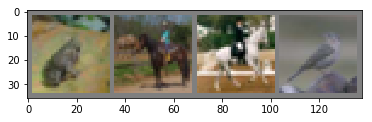

In [58]:
# 看看、这些数据都长什么样
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2. CNN定义


In [59]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return x
    
net = Net()

In [60]:
net

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

### 3. 定义损失函数和optimizer

In [61]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network


In [62]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

AttributeError: type object 'object' has no attribute '__getattr__'